<a href="https://colab.research.google.com/github/Shivabairy005/Machine-Learning-Lab/blob/main/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)
        return self.activation(np.dot(x, self.weights))

    def train(self, X, y, epochs=10):
        for _ in range(epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * np.insert(X[i], 0, 1)


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

perceptron = Perceptron(input_size=2)
perceptron.train(X, y, epochs=100)


for i in X:
    print(f"Input: {i} Prediction: {perceptron.predict(i)}")

Input: [0 0] Prediction: 0
Input: [0 1] Prediction: 1
Input: [1 0] Prediction: 1
Input: [1 1] Prediction: 1


In [41]:
from sklearn.linear_model import Perceptron
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

db = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(db.data, db.target, test_size=0.2, random_state=0)

perceptron = Perceptron(alpha=42)

perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6491228070175439


Predictions: [0 0 0 1]
Weights: [0.2 0.1]
Bias: -0.20000000000000004


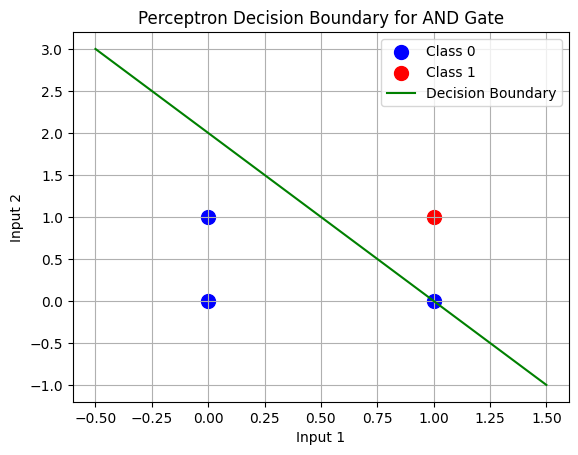

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X, y)

pred = p.predict(X)
print("Predictions:", pred)
print("Weights:", p.weights)
print("Bias:", p.bias)

for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='blue', s=100, label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color='red', s=100, label='Class 1' if i == 3 else "")

x1 = np.linspace(-0.5, 1.5, 100)
x2 = -(p.weights[0] * x1 + p.bias) / p.weights[1]
plt.plot(x1, x2, color='green', label='Decision Boundary')

plt.title("Perceptron Decision Boundary for AND Gate")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.grid(True)
plt.show()

Predictions: [0 1 1 1]
Weights: [0.1 0.1]
Bias: -0.1


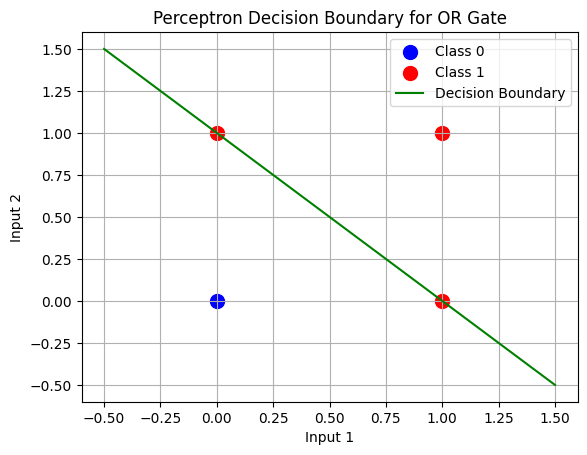

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 1])

p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X, y)

pred = p.predict(X)
print("Predictions:", pred)
print("Weights:", p.weights)
print("Bias:", p.bias)

for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='blue', s=100, label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color='red', s=100, label='Class 1' if i == 1 else "")

x1 = np.linspace(-0.5, 1.5, 100)
x2 = -(p.weights[0] * x1 + p.bias) / p.weights[1]
plt.plot(x1, x2, color='green', label='Decision Boundary')

plt.title("Perceptron Decision Boundary for OR Gate")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.grid(True)
plt.show()

Predictions for XOR Gate: [1 1 0 0]
Actual: [0 1 1 0]


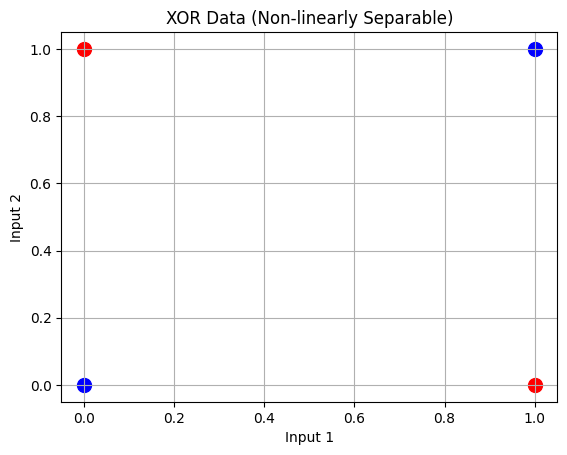

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X, y)
predictions = p.predict(X)

print("Predictions for XOR Gate:", predictions)
print("Actual:", y)

for i in range(len(X)):
    color = 'red' if y[i] == 1 else 'blue'
    plt.scatter(X[i][0], X[i][1], color=color, s=100)
plt.title("XOR Data (Non-linearly Separable)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

import numpy as np

def sigmoid(x):
    """Sigmoid activation function: f(x) = 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        """Compute neuron output using weights, bias, and activation function."""
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7216325609518421


In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, n_iters=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = learning_rate
        self.n_iters = n_iters


        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.1
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.1
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2


    def backward(self, X, y, output):
        m = X.shape[0]

        dZ2 = output - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * sigmoid_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2


    def fit(self, X, y):
        for i in range(self.n_iters):
            output = self.forward(X)
            self.backward(X, y, output)
            if (i+1) % 1000 == 0:
                loss = np.mean((y - output)**2)
                print(f"Iteration {i+1}, Loss: {loss:.4f}")


    def predict(self, X):
        output = self.forward(X)
        return np.round(output)

if __name__ == "__main__":

    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[0],[1],[1],[0]])

    mlp = MLP(input_size=2, hidden_size=4, output_size=1, learning_rate=0.5, n_iters=10000)
    mlp.fit(X, y)

    predictions = mlp.predict(X)
    print("Predictions:")
    print(predictions)

Iteration 1000, Loss: 0.2500
Iteration 2000, Loss: 0.2500
Iteration 3000, Loss: 0.2500
Iteration 4000, Loss: 0.2500
Iteration 5000, Loss: 0.2500
Iteration 6000, Loss: 0.2500
Iteration 7000, Loss: 0.2500
Iteration 8000, Loss: 0.2352
Iteration 9000, Loss: 0.0026
Iteration 10000, Loss: 0.0002
Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', solver='adam')

mlp.fit(X_train, y_train)


train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)

print(f"Training Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")


Training Accuracy: 1.0
Test Accuracy: 0.9777777777777777


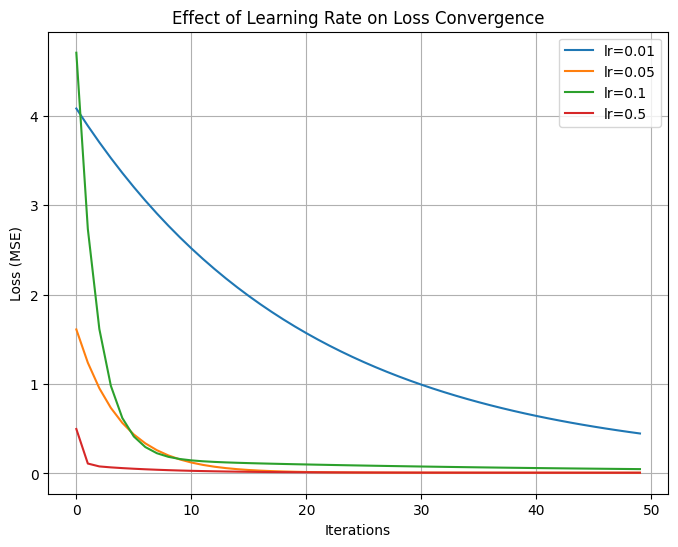

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X.squeeze() + 1 + 0.1 * np.random.randn(100)
y = y.reshape(-1, 1)

class SimpleNeuron:
    def __init__(self):
        self.w = np.random.randn(1, 1)
        self.b = 0

    def forward(self, X):
        return np.dot(X, self.w) + self.b

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)  # MSE

    def train(self, X, y, lr, n_iters):
        losses = []
        for _ in range(n_iters):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            losses.append(loss)

            # Gradient descent
            dw = np.mean(2 * (y_pred - y) * X)
            db = np.mean(2 * (y_pred - y))
            self.w -= lr * dw
            self.b -= lr * db
        return losses

learning_rates = [0.01, 0.05, 0.1, 0.5]
n_iters = 50

plt.figure(figsize=(8,6))
for lr in learning_rates:
    neuron = SimpleNeuron()
    losses = neuron.train(X, y, lr=lr, n_iters=n_iters)
    plt.plot(range(n_iters), losses, label=f'lr={lr}')

plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Effect of Learning Rate on Loss Convergence")
plt.legend()
plt.grid(True)
plt.show()

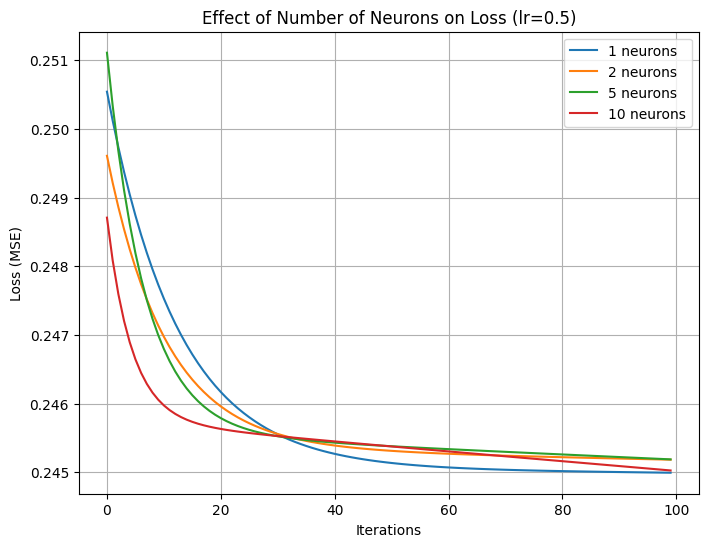

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:,0] + X[:,1] > 1).astype(int).reshape(-1,1)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


def train_mlp(X, y, hidden_neurons, lr=0.1, n_iters=100):
    n_input = X.shape[1]
    n_hidden = hidden_neurons
    n_output = 1

    W1 = np.random.randn(n_input, n_hidden) * 0.1
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output) * 0.1
    b2 = np.zeros((1, n_output))

    losses = []

    for _ in range(n_iters):
        Z1 = np.dot(X, W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = sigmoid(Z2)

        loss = np.mean((y - A2)**2)
        losses.append(loss)

        dZ2 = (A2 - y) * sigmoid_derivative(A2)
        dW2 = np.dot(A1.T, dZ2) / X.shape[0]
        db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * sigmoid_derivative(A1)
        dW1 = np.dot(X.T, dZ1) / X.shape[0]
        db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    return losses

neuron_counts = [1, 2, 5, 10]
lr = 0.5
n_iters = 100

plt.figure(figsize=(8,6))
for n in neuron_counts:
    loss_curve = train_mlp(X, y, hidden_neurons=n, lr=lr, n_iters=n_iters)
    plt.plot(loss_curve, label=f'{n} neurons')

plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title(f"Effect of Number of Neurons on Loss (lr={lr})")
plt.legend()
plt.grid(True)
plt.show()